In [76]:
import keras
import glob
import ntpath
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from scipy import ndimage, misc
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import train_test_split

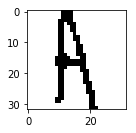

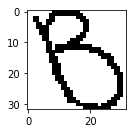

In [77]:
plt.subplot(2,1,1)
test_img = misc.imread('data/u_A/v2-00001.png')
plt.imshow(test_img)
plt.show()

plt.subplot(2,1,2)
test_img = misc.imread('data/u_B/v2-00022.png')
plt.imshow(test_img)
plt.show()

In [78]:
def black_white(pixel):
    if all(pixel == 0): return 0
    else: return 1

In [79]:
def to_vector(image):
    return np.array([black_white(pixel) for row in image for pixel in row])

In [80]:
def read_data(path, limit = 10):
    label_names = []
    character_data = []
    labels = []
    characters = glob.glob('./data/*')[:limit]
    label = 0
    for character in characters:
        character_name = ntpath.basename(character)
        label_names.append(character_name)
        character_images = glob.glob(character + '/*')
        for char_image in character_images:
            image = misc.imread(char_image)
            character_data.append(to_vector(image))
            labels.append(label)
        label += 1
    return label_names, character_data, labels

In [81]:
names, data, labels = read_data('')

In [82]:
data = np.array(data)
labels = np.array(labels)

In [83]:
data.shape, labels.shape

((621, 1024), (621,))

In [84]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, random_state=42)

In [85]:
len(x_train), len(x_test), len(y_train), len(y_test)

(496, 125, 496, 125)

In [86]:
number_of_classes = len(names)

In [87]:
y_train = keras.utils.to_categorical(y_train, number_of_classes)
y_test = keras.utils.to_categorical(y_test, number_of_classes)

In [88]:
# building the model
model = Sequential()
model.add(Dense(512, input_shape=(1024,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes))
model.add(Activation('softmax'))

# compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [89]:
batch_size = 16
epochs = 10

In [90]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, 
                       verbose=1)

Train on 446 samples, validate on 50 samples
Epoch 1/10
446/446 [==============================] - 0s - loss: 3.0355 - acc: 0.1502 - val_loss: 1.9520 - val_acc: 0.3600
Epoch 2/10
446/446 [==============================] - 0s - loss: 1.9920 - acc: 0.3139 - val_loss: 1.7013 - val_acc: 0.6000

In [91]:
print('\n\n--------------------------------')
print('Test score:', score[0])
print('Test accuracy:', score[1])



--------------------------------
Test score: 0.932361867905
Test accuracy: 0.704000002861


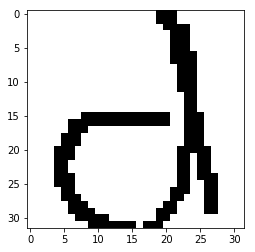

In [93]:
d = misc.imread('data/d/v2-01458.png')
plt.imshow(d)
plt.show()

In [102]:
predictions = model.predict(x = np.array([to_vector(d)]))[0]
for label, prediction in zip(names, predictions):
    print(label + ': ' + str(prediction))

a: 0.323007
b: 0.0286748
c: 0.00458244
d: 0.416467
e: 0.0391815
f: 0.0155726
g: 0.0509755
h: 0.0779109
i: 0.011076
j: 0.0325522
